# **The Safest vs. Most Risky Apartment in the Toronto (Safety Score Ranking)**

# **Introduction**

**Problem Statement**

Apartment safety is a crucial concern for tenants, property managers, and city officials. Many rental buildings in the city vary significantly in terms of safety features, maintenance, and compliance with regulations. Factors such as fire safety systems, emergency preparedness, and accessibility can greatly impact the well-being of residents.

The challenges include:

* Variability in Safety Features: Some buildings lack adequate fire safety measures, emergency power, or proper accessibility features, making them riskier for tenants.
* Data Complexity: The dataset contains many attributes, requiring careful selection and engineering of relevant features for meaningful insights.
* Ranking Buildings Based on Safety: There is currently no standardized method to rank apartment buildings in terms of safety compliance.


**Study Aim**

The goal of this project is to analyze apartment safety in the city by creating a Safety Score Ranking based on key building attributes. This will help in:

* Identifying high-risk and low-risk buildings based on fire safety, emergency preparedness, and accessibility factors.
* Highlighting common safety concerns among rental apartments.
* Providing actionable insights for tenants, property managers, and policymakers to improve building safety standards.


**Notebook Covers**

* Data Cleaning: Handling missing values, standardizing categories, and filtering irrelevant columns.
* Feature Engineering: Creating a Safety Score using weighted attributes related to fire safety, emergency preparedness, and accessibility.
* Exploratory Data Analysis (EDA): Understanding patterns in building safety across different locations and property types.
* Data Visualization: Using charts, and heatmaps to present findings in an intuitive way.
* Recommendations based on EDA and visualization 

# Data Preparation 

**2.1 Uploading Dataset**

In [38]:
# Importing libtaries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




# Loading dataset
apartment_dataset = pd.read_csv("/kaggle/input/datasetshs/apartment_building_registration_dataset.csv")

In [39]:
# Convert all column names to lowercase
apartment_dataset.columns = apartment_dataset.columns.str.lower()

# Summary information about the dataset
apartment_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597 entries, 0 to 3596
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   _id                                    3597 non-null   int64  
 1   air_conditioning_type                  3547 non-null   object 
 2   amenities_available                    1013 non-null   object 
 3   annual_fire_alarm_test_records         3545 non-null   object 
 4   annual_fire_pump_flow_test_records     3518 non-null   object 
 5   approved_fire_safety_plan              3545 non-null   object 
 6   balconies                              3549 non-null   object 
 7   barrier_free_accessibilty_entr         3550 non-null   object 
 8   bike_parking                           3597 non-null   object 
 9   confirmed_storeys                      3597 non-null   int64  
 10  confirmed_units                        3597 non-null   int64  
 11  date

**2.2. Crating new dataset by using necessary columns from original dataset**

In [40]:
selected_columns = [
    "_id",
    "pcode",
    "approved_fire_safety_plan",
    "fire_alarm",
    "sprinkler_system",
    "sprinkler_system_test_record",
    "exterior_fire_escape",
    "emerg_power_supply_test_records",
    "is_there_emergency_power",
    "annual_fire_alarm_test_records",
    "annual_fire_pump_flow_test_records",
    "year_built",
    "year_of_replacement",
    "heating_equipment_status",
    "tssa_test_records",
    "no_of_elevators",
    "no_of_units",
    "barrier_free_accessibilty_entr",
    "no_barrier_free_accessble_units",
    "no_of_storeys",
    "ward"
]

# Create new dataset by selecting the required columns
df = apartment_dataset[selected_columns].copy()


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597 entries, 0 to 3596
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   _id                                 3597 non-null   int64  
 1   pcode                               3522 non-null   object 
 2   approved_fire_safety_plan           3545 non-null   object 
 3   fire_alarm                          3545 non-null   object 
 4   sprinkler_system                    3544 non-null   object 
 5   sprinkler_system_test_record        2518 non-null   object 
 6   exterior_fire_escape                3538 non-null   object 
 7   emerg_power_supply_test_records     1688 non-null   object 
 8   is_there_emergency_power            3547 non-null   object 
 9   annual_fire_alarm_test_records      3545 non-null   object 
 10  annual_fire_pump_flow_test_records  3518 non-null   object 
 11  year_built                          3580 no

In [42]:
# Showing first 5 elements of dataset
df.head()

,_id,pcode,approved_fire_safety_plan,fire_alarm,sprinkler_system,sprinkler_system_test_record,exterior_fire_escape,emerg_power_supply_test_records,is_there_emergency_power,annual_fire_alarm_test_records,...,year_built,year_of_replacement,heating_equipment_status,tssa_test_records,no_of_elevators,no_of_units,barrier_free_accessibilty_entr,no_barrier_free_accessble_units,no_of_storeys,ward
0,134649,M2R,YES,YES,YES,YES,NO,NaN,NO,YES,...,1961.0,2011.0,REPLACED,YES,2,NaN,YES,71.0,NaN,6
1,134650,M2R,YES,YES,YES,YES,NO,NaN,NO,YES,...,1965.0,NaN,REPLACED,YES,2,NaN,YES,0.0,NaN,6
2,134651,M9N,YES,YES,NO,NaN,NO,NaN,NO,YES,...,1960.0,NaN,REPLACED,NaN,0,NaN,NO,0.0,NaN,5
3,134652,M9N,YES,YES,YES,YES,YES,NaN,NO,YES,...,1958.0,NaN,ORIGINAL,NaN,0,NaN,NO,0.0,NaN,5
4,134653,M9N,YES,YES,NO,NO,NO,NaN,NO,YES,...,1954.0,NaN,REPLACED,NaN,0,NaN,NO,0.0,NaN,5


**2.3 Data Preprocessing**

Following action will be done over dataset:

1. Removing columns that have zero non-null values
2. Amputating values on columns where value not given
3. Adjusting datatype for required columns
4. Removing rows with empty entities
5. Transforming postal code column into region names
6. Grouping apartments depend on age

In [43]:
# Removing columns like no_of_storeys have zero non-null values. 
df.drop(columns=["no_of_storeys", "no_of_units", "year_of_replacement"], inplace=True)

In [44]:
#  Fill missing values with a placeholder ("No" for object columns, or 0 for numeric)

# List of columns to fill with "NO"
columns_to_fill = ["approved_fire_safety_plan", "fire_alarm", "sprinkler_system", 
                   "exterior_fire_escape", "emerg_power_supply_test_records", 
                   "is_there_emergency_power", "annual_fire_alarm_test_records", 
                   "annual_fire_pump_flow_test_records", "heating_equipment_status", 
                   "tssa_test_records", "barrier_free_accessibilty_entr"]

# Fill NaN values with "NO" for the selected columns
df[columns_to_fill] = df[columns_to_fill].fillna("NO")


# Setting NaN values in 'sprinkler_system_test_record' based on the value of 'sprinkler_system'
df["sprinkler_system_test_record"] = df.apply(
    lambda row: "YES" if row["sprinkler_system"] == "YES" and pd.isna(row["sprinkler_system_test_record"]) else ("NO" if pd.isna(row["sprinkler_system_test_record"]) else row["sprinkler_system_test_record"]),
    axis=1
)


df["no_barrier_free_accessble_units"] = df["no_barrier_free_accessble_units"].fillna(0)


In [45]:
# Convert the 'no_barrier_free_accessble_units' column to integer
df['no_barrier_free_accessble_units'] = df['no_barrier_free_accessble_units'].astype('int64')


# Drop rows where 'p code' is Nan
df.dropna(subset=['pcode'], inplace = True)

# Drop rows where 'year-built' column is Nan
df.dropna(subset=['year_built'], inplace = True)

# Convert the 'year-built' column from float to integer
df['year_built'] = df['year_built'].astype('int64')


In [46]:
# Grouping based on the first 2 characters of postal code
region_map = {
    'M1': 'Scarborough',
    'M2': 'North York',
    'M3': 'North York',
    'M4': 'East York / Central Toronto / East Toronto',
    'M5': 'Downtown Toronto / Central Toronto',
    'M6': 'West Toronto / York',
    'M7': 'Government / Not Assigned',
    'M8': 'Etobicoke',
    'M9': 'Etobicoke / York'
}

# Extracting FSA prefix (first 2 characters)
df['fsa_prefix'] = df['pcode'].str[:2]

# Map to region
df['toronto_region'] = df['fsa_prefix'].map(region_map)


In [47]:
# Create 'building_age' feature from 'year_built'
df['building_age'] = 2025 - df['year_built']

# Create 25-year interval bins (0-25, 26-50, ..., up to 200+)
bins = list(range(0, 201, 25)) + [float('inf')]
labels = [f'{i+1}-{i+25}' for i in range(0, 200, 25)] + ['200+']
# Apply to building_age
df['building_age_group'] = pd.cut(df['building_age'], bins=bins, labels=labels, right=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3507 entries, 0 to 3596
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   _id                                 3507 non-null   int64   
 1   pcode                               3507 non-null   object  
 2   approved_fire_safety_plan           3507 non-null   object  
 3   fire_alarm                          3507 non-null   object  
 4   sprinkler_system                    3507 non-null   object  
 5   sprinkler_system_test_record        3507 non-null   object  
 6   exterior_fire_escape                3507 non-null   object  
 7   emerg_power_supply_test_records     3507 non-null   object  
 8   is_there_emergency_power            3507 non-null   object  
 9   annual_fire_alarm_test_records      3507 non-null   object  
 10  annual_fire_pump_flow_test_records  3507 non-null   object  
 11  year_built                         

# **Feature Engineering** 

Steps for Feature Engineering:
1. Converting Categorical Variables (e.g., Yes/No, categories) into numerical format.
2. Normalizing Numerical Varaibles to scale values between 0 and 1 (Min-Max Scaling).
3. Creating a Safety Score by assigning weights to key safety attributes

**STEP 1**

In [49]:
from sklearn.preprocessing import MinMaxScaler



# Step 1 
# Convert categorical variables (Yes/No) to 1/0
categorical_columns = ["fire_alarm", "sprinkler_system","sprinkler_system_test_record", "exterior_fire_escape",
                       "approved_fire_safety_plan", "is_there_emergency_power","emerg_power_supply_test_records",
                       "annual_fire_alarm_test_records","annual_fire_pump_flow_test_records", "barrier_free_accessibilty_entr",
                       "tssa_test_records"]

for col in categorical_columns:
    df[col] = df[col].map({'YES': 1, 'NO': 0})


# Convert categorical varaible heating_equipment_status (Replaced/Original/NO) to 1/0.5/0
df['heating_equipment_status'] = df['heating_equipment_status'].map({'REPLACED': 1, 'ORIGINAL': 0.5, 'NO':0}).astype(int)

**Step 2**

In [50]:
# Step 2 
# Normalizing 'no_of_elevators' but number of elevator is kinda dangerous when is emergency so: 
scaler = MinMaxScaler()
df['no_of_elevators_norm'] = 1 - scaler.fit_transform(df[['no_of_elevators']])

# Normalizing 'building_age' column 
df['building_age_norm'] = scaler.fit_transform(df[['building_age']])

# Normalizing number of ward
df['ward_norm'] = scaler.fit_transform(df[['ward']])

**Step 3**

In [51]:
# Step 3
# Define the weights
weights = {
    'approved_fire_safety_plan': 0.18,
    'fire_alarm': 0.10,
    'sprinkler_system': 0.10,
    'sprinkler_system_test_record': 0.05,
    'exterior_fire_escape': 0.10,
    'emerg_power_supply_test_records': 0.05,
    'is_there_emergency_power': 0.10,
    'annual_fire_alarm_test_records': 0.05,
    'annual_fire_pump_flow_test_records': 0.05,
    'heating_equipment_status': 0.05,
    'tssa_test_records': 0.05,
    'barrier_free_accessibilty_entr': 0.05,
    'no_of_elevators_norm': 0.02
}

# Calculate the Safety Score
df['safety_score'] = sum(df[col] * weight for col, weight in weights.items())

# Normalize to 0–100 scale
df['safety_score_100'] = df['safety_score'] * 100

In [52]:
# Sorting the dataset by safety_score_100 in descending order
top_5 = df.sort_values(by='safety_score_100', ascending=False).head(5)

# Displaying top 5 safest buildings
print(top_5[['_id', 'building_age', 'toronto_region', 'safety_score_100']])


         _id  building_age    toronto_region  safety_score_100
2920  137569            68         Etobicoke           94.9375
1100  135749            65       Scarborough           94.9375
1389  136038            65        North York           94.8750
1777  136426            32  Etobicoke / York           94.8750
2340  136989            55       Scarborough           94.8750


In [53]:
# Sorting the dataset by safety_score_100 in ascending order
top_5 = df.sort_values(by='safety_score_100', ascending=True).head(5)

# Displaying top 5 lowest safety score buildings
print(top_5[['_id', 'building_age', 'toronto_region', 'safety_score_100']])


         _id  building_age       toronto_region  safety_score_100
2601  137250            65  West Toronto / York            1.8750
1173  135822            55          Scarborough            1.8750
3257  137906            50  West Toronto / York            1.8750
1917  136566            65  West Toronto / York            1.8750
1415  136064            63  West Toronto / York            1.9375


# **Explatory Data Analysis**

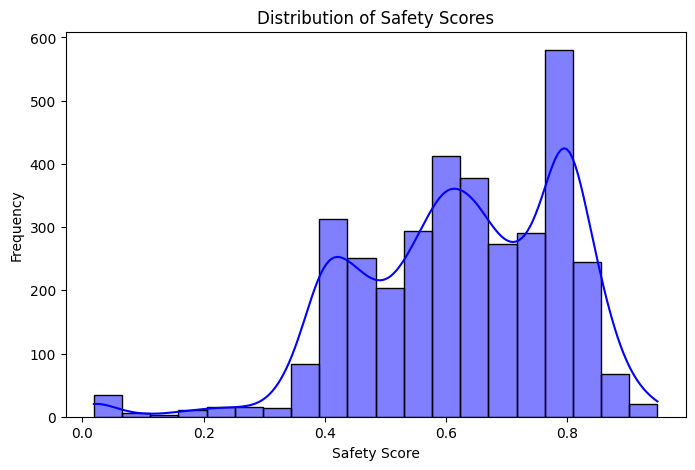

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Safety Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['safety_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Safety Scores')
plt.xlabel('Safety Score')
plt.ylabel('Frequency')
plt.show()

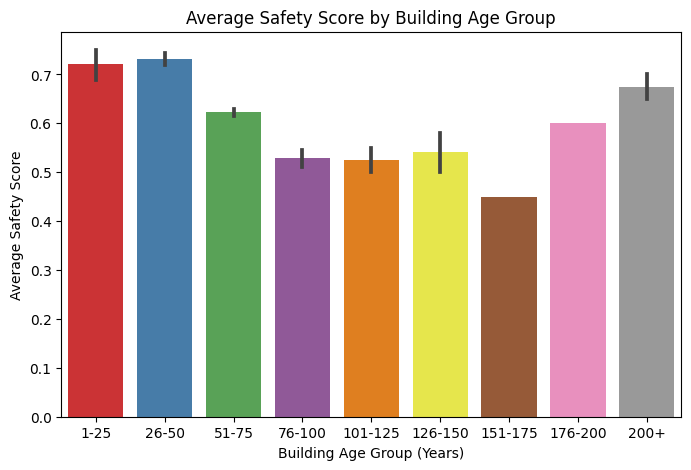

In [55]:
# Average Safety Score by Building Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x='building_age_group', y='safety_score',data=df, estimator='mean',palette='Set1')
plt.title('Average Safety Score by Building Age Group')
plt.xlabel('Building Age Group (Years)')
plt.ylabel('Average Safety Score')
plt.show()

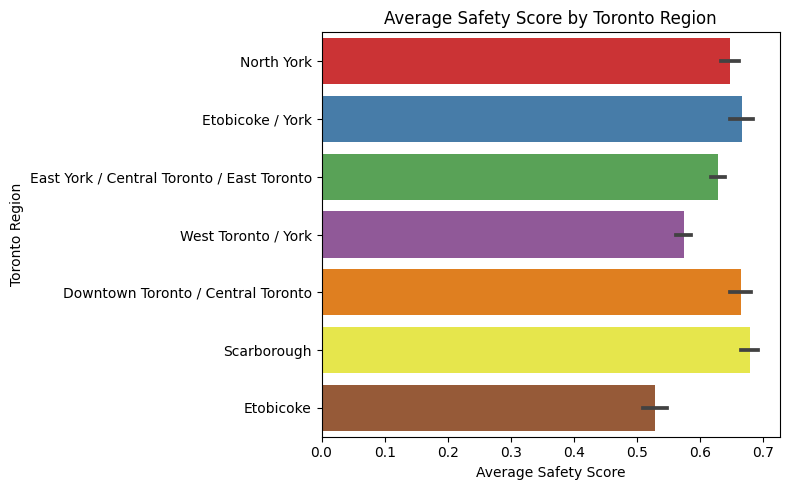

In [56]:
# Average Safety Score by Region
plt.figure(figsize=(8, 5))  
sns.barplot(y='toronto_region', x='safety_score', data=df, estimator='mean', palette='Set1')
plt.title('Average Safety Score by Toronto Region')
plt.xlabel('Average Safety Score')
plt.ylabel('Toronto Region')
plt.tight_layout()
plt.show()

**Key Observations from Safety Score Distribution**
1. Distribution is bimodal, meaning there are two clusters of buildings—one with lower safety scores (0.3–0.5) and one with higher scores (0.6–0.8).
2. Few buildings have extremely low safety scores (~0.1–0.2), which could indicate properties lacking fire safety features or failing inspections.
3. The highest concentration of buildings is in the 0.6–0.8 range, meaning most buildings meet moderate safety standards but aren't perfect.


**Key Observations from Average Safety Score by Building Age-Group Distribution**
1. Newer buildings (1-25 years) have the highest safety scores (~0.72), meaning modern safety regulations and construction codes are effective.
2. Buildings aged 76-175 years have the lowest safety scores (~0.45–0.54), showing aging infrastructure and outdated safety features.
3. Surprisingly, 200+ year-old buildings have improved safety (~0.68), which may indicate renovation efforts or strict regulations on historical buildings.


**Key Observations from Average Safety Score by Region Distribution**
1. Scarborough has the highest average safety score (~0.68), meaning buildings here generally meet or exceed safety standards.
2. West Toronto and Etobicoke/York have lower safety scores (~0.53–0.57), likely due to older buildings and high population density.
3. East York also have moderate-to-low scores (~0.63), indicating potential safety concerns in older residential zones.

# *Recommendations*

1. Target safety regulations at mid-aged buildings (76-175 years old) to reduce fire hazards and modernize safety infrastructure.
2. Study why Scarborough has higher safety scores and apply similar policies to lower-scoring regions.
3. Encourage landlords and property owners to upgrade fire safety features to push scores above 0.8.

In [59]:
df.to_csv("safety_score_tableau.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/safety_by_region.png'

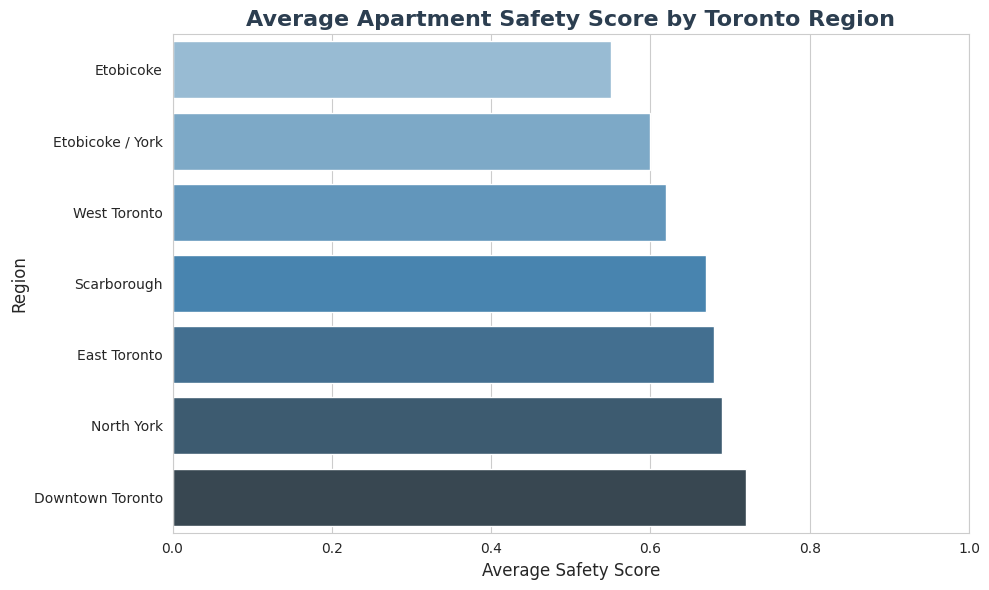

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Replace this with your actual grouped DataFrame
data = {
    'Region': [
        'Downtown Toronto', 'North York', 'Scarborough', 'Etobicoke',
        'East Toronto', 'West Toronto', 'Etobicoke / York'
    ],
    'Average_Score': [0.72, 0.69, 0.67, 0.55, 0.68, 0.62, 0.60]
}
df_region = pd.DataFrame(data)

# Sort by score
df_region = df_region.sort_values('Average_Score')

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bar = sns.barplot(
    x='Average_Score', 
    y='Region', 
    data=df_region, 
    palette='Blues_d'
)

plt.title('Average Apartment Safety Score by Toronto Region', fontsize=16, weight='bold', color='#2c3e50')
plt.xlabel('Average Safety Score', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()

# Save image
plt.savefig("/mnt/data/safety_by_region.png", dpi=300)
